In [1]:
import os
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
directory='../data/raw/image/'
image_list=[]
for file in os.listdir(directory):
    filename=os.path.join(directory,file)
    image_list.append(filename)

In [4]:
# transform all images with their weights and heights into one dataframe
image_list.sort()
df=pd.DataFrame([],columns=['image','height','width'])
for index,img_file in enumerate(image_list):
    img=cv2.imread(img_file,cv2.IMREAD_COLOR)
    img_h,img_w,_=img.shape
    new_row=pd.DataFrame({'image':img_file,'height':img_h,'width':img_w},index=[index])
    df=pd.concat([df,new_row],axis=0)
        

In [5]:
df.head()

,image,height,width
0,../data/raw/image/image_1.jpg,522,775
1,../data/raw/image/image_10.jpg,522,775
2,../data/raw/image/image_100.jpg,522,775
3,../data/raw/image/image_101.jpg,522,775
4,../data/raw/image/image_102.jpg,522,775


In [6]:
# get images with minimum height
df[df.height==df.height.min()]

,image,height,width
18,../data/raw/image/image_115.jpg,430,567


In [7]:
# get images with minimum width
df[df.width==df.width.min()]

,image,height,width
18,../data/raw/image/image_115.jpg,430,567


In [8]:
def image_resize(image, width = None, height = None, inter = cv2.INTER_LANCZOS4):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

(430, 567, 3)


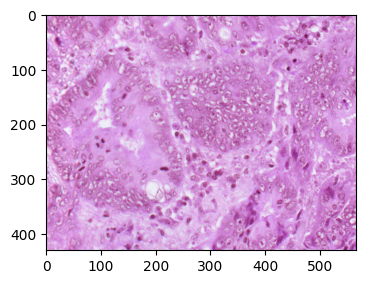

In [21]:
img=cv2.imread(image_list[18],cv2.IMREAD_COLOR)
fig = plt.figure(figsize=(4, 4))
print(img.shape)
plt.imshow(img)
plt.show()

(420, 420, 3)
(420, 420, 3)
(420, 420, 3)
(420, 420, 3)


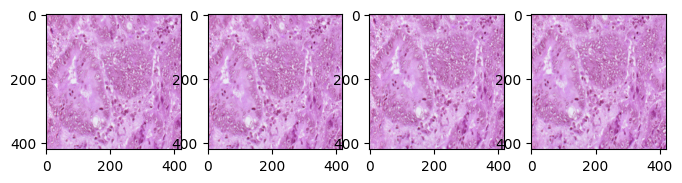

In [44]:
img=cv2.resize(img, (450,450), interpolation = cv2.INTER_LANCZOS4)
h,w,_=img.shape
list_crops=[]
possible_ys=list(range(0,h-420+1,420))
if h % 420 != 0:
    possible_ys.append(h-420)
possible_xs=list(range(0,w-420+1,420))
if w % 420 != 0:
    possible_xs.append(w-420)
for j in possible_ys:
    for i in possible_xs:
        list_crops.append(img[j:j+420,i:i+420,:])
fig = plt.figure(figsize=(8, 8))
for idx,crop in enumerate(list_crops):
    print(crop.shape)
    fig.add_subplot(1, len(list_crops), idx+1)
    plt.imshow(crop)
plt.show()

In [50]:
for i in range(0,450-420+1,420):
    print(i)

0
